# Import

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import copy

import pickle
from datetime import datetime

import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import poisson
from scipy import spatial

# import code
from simulation import Simulation
from replicate_graph import layer_graph
import data
from data import select_dataset, get_station_g, set_random_speed_columns
from visualization import set_draw_attributes

import os

import re
from tqdm import tqdm

# Simulation

Intialize the simulation with basic parameters.

In [2]:
simulation_length = 12
battery_interval = 20
kwh_per_km = 1.15
battery_capacity = 215
stations_csv_path = "data/wcctci_stations-updated.csv"
distances_csv_path = "data/wcctci_coord_distances.csv"
name = "debug"
sim = Simulation(name, stations_csv_path, distances_csv_path, simulation_length, battery_interval, kwh_per_km, battery_capacity)
sim.add_demand_nodes()

In [3]:
# for component in nx.weakly_connected_components(sim.battery_g):
#     print(component)

In [4]:
sim.run()

Strongly connected components: 216
Weakly connected components: 44
Weakly connected?: False


100%|███████████████████████████████████████████| 12/12 [00:51<00:00,  4.32s/it]


{'station_utilization_disp_of_avg': 9.958593749999999,
 'station_utilization_avg_of_disp': 10.368489583333334,
 'electricity': 0,
 'percent_delay': (1.0,
  1.0,
  2.7158149772502664,
  1.0760343996410304,
  0.24649486097766557),
 'hours_spent_in_queues': (0.0,
  0.0,
  4.2,
  0.12941176470588234,
  0.5777168829421393),
 'hours_spent_charging': (0, 0.0, 25, 0.7615546218487395, 2.352558257782398),
 'station_utilization': [0.0,
  12.447916666666666,
  2.004166666666667,
  1.225,
  14.1875,
  0.5166666666666667,
  4.802083333333333,
  10.529166666666667,
  0.0,
  0.0,
  0.0,
  14.183333333333334,
  0.0,
  1.1041666666666667,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9416666666666667,
  0.8625,
  0.0,
  0.1,
  2.347916666666667,
  0.8479166666666667,
  3.441666666666667,
  1.4375,
  0.275,
  0.30416666666666664,
  9.154166666666667,
  4.922916666666667,
  4.245833333333334,
  0.0,
  0.7854166666666667,
  9.441666666666666,
  0.9333333333333333,
  0.0,
  0.020833333333333332,
  2.408333333333333,
  1.

In [5]:
for v in sim.vehicle_list:
    print(v.path)

['Oakland_src', '41_100_out', '43_40_in', 'Sacramento_dst']
['Oakland_src', '41_100_out', '43_40_in', 'Sacramento_dst']
['Oakland_src', '41_100_out', '4_20_in', '4_60_out', '12_0_in', '12_60_out', '3_0_in', '3_60_out', '11_0_in', '11_100_out', '10_0_in', '10_40_out', '26_0_in', 'Long Beach_dst']
['Oakland_src', '41_100_out', '43_40_in', 'Sacramento_dst']
['Long Beach_src', '30_100_out', '2_0_in', '2_60_out', '11_0_in', '11_100_out', '12_0_in', '12_60_out', '4_0_in', '4_80_out', '41_0_in', 'Oakland_dst']
['Long Beach_src', '30_100_out', '2_0_in', '2_60_out', '11_0_in', '11_100_out', '12_0_in', '12_60_out', '4_0_in', '4_80_out', '41_0_in', 'Oakland_dst']
['Long Beach_src', '30_100_out', '2_0_in', '2_60_out', '11_0_in', '11_100_out', '12_0_in', '12_60_out', '4_0_in', '4_80_out', '41_0_in', 'Oakland_dst']
['Long Beach_src', '30_100_out', '2_0_in', '2_60_out', '31_0_in', '31_60_out', '32_0_in', '32_40_out', '33_0_in', 'Fresno_dst']
['Long Beach_src', '30_100_out', '2_0_in', '2_60_out', '31_

['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '21_0_in', '21_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', '33_80_out', '4_0_in', '4_100_out', '42_0_in', '42_80_out', '14_0_in', '14_60_out', '6_0_in', '6_100_out', '16_0_in', '16_40_out', '7_0_in', 'Oregon_dst']
['San Diego_src', '17_100_out', '21_0_in', '21_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', '33_80_out', '4_0_in', '4_100_out', '42_0_in', '42_60_out', '36_0_in', '36_80_out', '37_40_in', '37_40_out', '38_0_in', 'Reno_dst']
['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '21_0_in', '21_100_out', '2_0_in', '2_100_out', '32_0_in', '32_60_out', '33_20_in', '33_80_out', '4_0_in', '4_100_out', '43_0_in', 'Sacramento_dst']
['San Diego_src', '17_100_out', '21_0_in', '21_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', '33_80_out', '4_0_in', '4_80_out', '41_0_in', 'Oakland_dst']
['Sa

['Long Beach_src', '26_100_out', '2_0_in', '2_100_out', '3_0_in', '3_80_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '13_0_in', '13_60_out', '5_0_in', 'Sacramento_dst']
['Long Beach_src', '26_100_out', '2_0_in', '2_100_out', '3_0_in', '3_80_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '13_0_in', '13_60_out', '41_0_in', 'Oakland_dst']
['Long Beach_src', '9_100_out', '17_20_in', 'San Diego_dst']
['Long Beach_src', '26_100_out', '2_0_in', '2_100_out', '3_0_in', '3_80_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '13_0_in', '13_100_out', '39_0_in', '39_100_out', '15_0_in', '15_100_out', '16_40_in', '16_40_out', '7_0_in', 'Oregon_dst']
['Long Beach_src', '26_100_out', '2_0_in', '2_100_out', '3_0_in', '3_80_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '13_0_in', '13_60_out', '41_0_in', 'Oakland_dst']
['Long Beach_src', '26_100_out', '2_0_in', '2_100_out', '3_0_in', '3_80_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '13_0_in', '13_100_out', '39_0_in

['San Diego_src', '17_100_out', '27_20_in', '27_60_out', '29_0_in', '29_40_out', '10_0_in', '10_100_out', '11_0_in', '11_100_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '35_0_in', '35_60_out', '41_0_in', 'Oakland_dst']
['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '27_20_in', '27_60_out', '29_0_in', '29_40_out', '10_0_in', '10_100_out', '11_0_in', '11_100_out', '33_0_in', '33_60_out', '34_0_in', '34_60_out', '35_0_in', '35_100_out', '39_0_in', '39_100_out', '37_40_in', '37_40_out', '38_0_in', 'Reno_dst']
['San Diego_src', '17_100_out', '27_20_in', '27_60_out', '29_0_in', '29_40_out', '10_0_in', '10_100_out', '11_0_in', '11_100_out', '33_0_in', 'Fresno_dst']
['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '27_20_in', '27_60_out', '29_0_in', '29_40_out', '10_0_in', '10_100_out', '11_0_in', '11_100_out', '33_0_in', 'Fresno_dst']

['Long Beach_src', '30_100_out', '17_0_in', 'San Diego_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', '33_80_out', '4_0_in', '4_100_out', '5_0_in', '5_100_out', '37_40_in', '37_40_out', '38_0_in', 'Reno_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', 'Fresno_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', 'Fresno_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', '33_80_out', '4_0_in', '4_100_out', '5_0_in', '5_100_out', '37_40_in', '37_40_out', '38_0_in', 'Reno_dst']
['San Diego_src', '17_100_out', '30_0_in', 'Long Beach_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_100_out', '2_0_in', '2_100_out', '32_0_in', '32_40_out', '33_0_in', 'Fresno_dst']
['San Diego_src', '17_100_out', '26_0_in', '26_

In [6]:
for v in sim.vehicle_list:
    print(v.location, ":", v.distance_along_segment)

('43_40_in', 'Sacramento_dst') : 0
('43_40_in', 'Sacramento_dst') : 0
('11_0_in', '11_100_out') : 93.60000000000002
('43_40_in', 'Sacramento_dst') : 0
('4_0_in', '4_80_out') : 0
('4_0_in', '4_80_out') : 0
('4_0_in', '4_80_out') : 0
('33_0_in', 'Fresno_dst') : 0
('33_0_in', 'Fresno_dst') : 0
('4_0_in', '4_80_out') : 0
('17_0_in', 'San Diego_dst') : 0
('4_0_in', '4_80_out') : 0
('4_0_in', '4_80_out') : 0
('12_0_in', '12_60_out') : 54.0
('32_0_in', '32_40_out') : 0
('32_0_in', '32_40_out') : 0
('32_0_in', '32_40_out') : 0
('32_0_in', '32_60_out') : 0
('2_0_in', '2_60_out') : 9.0
('30_0_in', 'Long Beach_dst') : 0
('2_0_in', '2_60_out') : 9.0
('30_0_in', 'Long Beach_dst') : 0
('10_0_in', '10_40_out') : 0
('10_0_in', '10_40_out') : 0
('5_0_in', 'Sacramento_dst') : 0
('41_0_in', 'Oakland_dst') : 0
('41_0_in', 'Oakland_dst') : 0
('2_60_out', '10_0_in') : 27.09356192057503
('41_0_in', 'Oakland_dst') : 0
('41_0_in', 'Oakland_dst') : 0
('41_0_in', 'Oakland_dst') : 0
('11_0_in', '11_100_out') : 0


('40_0_in', '40_80_out') : 67.76470588235294
('39_0_in', '39_60_out') : 0
('40_0_in', '40_80_out') : 59.29411764705882
('43_60_in', 'Sacramento_dst') : 0
('43_60_in', 'Sacramento_dst') : 0
('33_0_in', 'Fresno_dst') : 0
('32_0_in', '32_60_out') : 45.0
('32_0_in', '32_60_out') : 45.0
('32_0_in', '32_60_out') : 45.0
('32_0_in', '32_60_out') : 0
('32_0_in', '32_60_out') : 0
('38_0_in', 'Reno_dst') : 0
('38_0_in', 'Reno_dst') : 0
('15_0_in', '15_100_out') : 0
('31_60_out', '32_0_in') : 7.017437835183506
('17_0_in', 'San Diego_dst') : 0
('31_60_out', '32_0_in') : 7.017437835183506
('17_0_in', 'San Diego_dst') : 0
('17_0_in', 'San Diego_dst') : 0
('31_0_in', '31_60_out') : 54.0
('32_0_in', '32_60_out') : 45.0
('38_20_in', 'Reno_dst') : 0
('33_0_in', 'Fresno_dst') : 0
('42_60_in', 'Oakland_dst') : 0
('15_0_in', '15_100_out') : 93.60000000000002
('32_0_in', '32_60_out') : 0
('32_0_in', '32_60_out') : 0
('32_0_in', '32_60_out') : 0
('43_60_in', 'Sacramento_dst') : 0
('32_0_in', '32_60_out') : 0


('10_0_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('30_0_in', 'Long Beach_dst') : 0
('30_0_in', 'Long Beach_dst') : 0
('10_20_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('10_20_in', '10_100_out') : 0
('13_0_in', '13_60_out') : 0
('13_0_in', '13_60_out') : 0
('11_100_out', '10_0_in') : 104.65452905307781
('11_100_out', '10_0_in') : 2.273679895024559
('13_0_in', '13_60_out') : 0
('13_0_in', '13_60_out') : 0
('11_100_out', '10_0_in') : 2.273679895024559
('13_0_in', '13_60_out') : 0
('13_0_in', '13_60_out') : 0
('13_0_in', '13_60_out') : 0
('42_60_in', 'Oakland_dst') : 0
('13_40_in', '13_100_out') : 0
('15_0_in', '15_100_out') : 0
('13_40_in', '13_100_out') : 0
('13_0_in', '13_100_out') : 0
('6_0_in', '6_60_out') : 0
('6_0_in', '6_20_out') : 0
('6_0_in', '6_20_out') : 0
('6_0_in', '6_20_out') : 0
('6_0_in', '6_20_out') : 0
('6_0_in', '6_60_out') : 0
('16_100_out', '6_0_in') : 

('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('30_0_in', 'Long Beach_dst') : 0
('21_100_out', '2_0_in') : 131.91614683526942
('21_100_out', '2_0_in') : 131.91614683526942
('21_100_out', '2_0_in') : 131.91614683526942
('21_100_out', '2_0_in') : 131.91614683526942
('30_0_in', 'Long Beach_dst') : 0
('21_100_out', '2_0_in') : 131.91614683526942
('21_100_out', '2_0_in') : 131.91614683526942
('30_0_in', 'Long Be

('13_0_in', '13_80_out') : 0
('32_100_out', '2_0_in') : 120.48125729471037
('13_0_in', '13_100_out') : 0
('32_100_out', '2_0_in') : 120.48125729471037
('13_0_in', '13_80_out') : 0
('13_0_in', '13_60_out') : 0
('32_100_out', '2_0_in') : 120.48125729471037
('32_100_out', '2_0_in') : 78.96576708652337
('32_100_out', '2_0_in') : 78.96576708652337
('13_0_in', '13_60_out') : 0
('32_100_out', '2_0_in') : 78.96576708652337
('13_0_in', '13_100_out') : 0
('32_100_out', '2_0_in') : 16.257657929578357
('13_0_in', '13_80_out') : 0
('13_40_in', '13_60_out') : 0
('42_60_in', 'Oakland_dst') : 0
('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('38_20_in', 'Reno_dst') : 0
('13_40_in', '13_60_out') : 0
('42_60_in', 'Oakland_dst') : 0
('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('6_0_in', '6_100_out') : 64.80000000000001
('13_40_in', '13_60_out') : 0
('6_0_in', '6_100_out') : 57.6000000000

('42_60_in', 'Oakland_dst') : 0
('13_40_in', '13_100_out') : 0
('42_60_in', 'Oakland_dst') : 0
('42_60_in', 'Oakland_dst') : 0
('42_60_in', 'Oakland_dst') : 0
('38_20_in', 'Reno_dst') : 0
('13_40_in', '13_100_out') : 0
('38_20_in', 'Reno_dst') : 0
('6_0_in', '6_100_out') : 0
('38_20_in', 'Reno_dst') : 0
('13_40_in', '13_100_out') : 0
('39_0_in', '39_60_out') : 0
('13_0_in', '13_100_out') : 0
('13_0_in', '13_100_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('13_0_in', '13_100_out') : 0
('13_0_in', '13_100_out') : 0
('42_0_in', 'Oakland_dst') : 0
('39_0_in', '39_60_out') : 0
('13_0_in', '13_100_out') : 0
('37_100_out', '13_0_in') : 135.8501933759415
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('35_40_in', '35_100_out') : 0
('3

('9_20_in', '9_100_out') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', 'Long Beach_dst') : 0
('9_20_in', '9_100_out') : 0
('9_20_in', '9_100_out') : 0
('3_40_in', '3_100_out') : 0
('13_0_in', '13_100_out') : 0
('13_0_in', '13_60_out') : 0
('3_40_in', '3_100_out') : 0
('3_40_in', '3_100_out') : 0
('13_0_in', '13_60_out') : 0
('3_40_in', '3_100_out') : 0
('3_40_in', '3_100_out') : 0
('3_40_in', '3_100_out') : 0
('13_0_in', '13_60_out') : 0
('3_40_in', '3_100_out') : 0
('13_0_in', '13_60_out') : 0
('3_40_in', '3_100_out') : 0
('

('13_40_in', '13_60_out') : 0
('13_40_in', '13_60_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('37_60_in', '37_100_out') : 0
('37_60_in', '37_100_out') : 0
('37_60_in', '37_100_out') : 0
('37_60_in', '37_80_out') : 0
('37_60_in', '37_100_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('43_0_in', '43_40_out') : 0
('43_0_in', '43_40_out') : 0
('37_60_in', '37_100_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('37_60_in', '37_100_out') : 0
('37_60_in', '37_80_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('37_60_in', '37_100_out') : 0
('37_60_in', '37_80_out') : 0
('37_60_in', '37_100_out') : 0
('43_0_in', '43_40_out') : 0
('43_0_in', '43_40_out') : 0
('37_60_in', '37_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_

('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('17_0_in', 'San Diego_dst') : 0
('2_0_in', '2_100_out') : 0
('2_0_in', '2_100_out') : 0
('8_60_in', '8_80_out') : 0
('8_60_in', '8_80_out') : 0
('30_0_in', 'Long Beach_dst') : 0
('8_60_in', 

('38_20_in', 'Reno_dst') : 0
('42_60_in', 'Oakland_dst') : 0
('35_40_in', '35_60_out') : 0
('38_20_in', 'Reno_dst') : 0
('36_20_in', 'Sacramento_dst') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_40_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_40_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('36_20_in', 'Sacramento_dst') : 0
('43_0_in', '43_40_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('43_0_in', '43_60_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '16_100_out') : 0
('16_40_in', '1

('33_100_out', '4_20_in') : 141.466660620843
('33_100_out', '4_20_in') : 141.466660620843
('33_100_out', '11_0_in') : 145.44707561741285
('33_100_out', '11_0_in') : 145.44707561741285
('42_60_in', 'Oakland_dst') : 0
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('37_60_out', '38_20_in') : 61.70841220296622
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('43_100_out', '4_0_in') : 141.7550010595069
('37_60_out', '38_20_in') : 61.70841220296622
('43_100_out', '4_0_in') : 141.7550010595069
('42_60_in', 'Oakland_dst') : 0
('43_100_out', '4_0_in') : 141.7550010595069
('42_60_in', 'Oakland_dst') : 0
('37_60_out', '38_20_in') : 61.70841220296622
('43_100_out', '4_0_in') : 141.75500105950

('33_100_out', '4_20_in') : 101.98580115745493
('43_100_out', '4_0_in') : 99.74354284232211
('42_60_in', 'Oakland_dst') : 0
('43_100_out', '4_0_in') : 99.74354284232211
('42_60_in', 'Oakland_dst') : 0
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('14_40_in', '14_100_out') : 8.184278071462552
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('42_60_in', 'Oakland_dst') : 0
('42_60_in', 'Oakland_dst') : 0
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('43_100_out', '4_0_in') : 99.74354284232211
('37_60_out', '5_0_in') : 21.527611539457254
('37_60_out', '5_0_in') : 21.527611539457254
('37_60_out',

('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('38_100_out', '37_60_in') : 50.054038867377685
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334
('7_100_out', '16_40_in') : 33.652976694821334


('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('Oregon_src', '7_100_out') : 40.0
('41_100_out', '4_20_in') : 19.184876392073345
('Oakland_src', '42_100_out') : 20.0
('41_100_out', '4_20_in') : 19.184876392073345
('41_100_out', '4_20_in') : 19.184876392073345
('Oakland_src', '42_100_out') : 20.0
('Oakland_src', '42_100_out') : 20.0
('41_100_out', '4_20_in') : 19.184876392073345
('41_100_out', '4_20_in') : 19.184876392073345
('Oakland_src', '42_100_out') : 20.0
('Oakland_src', '42_100_out') : 20.0
('41_100_out', '4_20_in') : 19.184876392073345
('Oakland_src', '42_100_out') : 20.0
('Oakland_src', '42_100_out') : 20.0
('Oakland_src', '42_100_out') : 20.0
('41_100_out', '4_20_in') : 19.184876392073345
('Oakland_src', '42_100_out') : 20.0
('41_100_out', '4_20_in') : 19.184876392073345
('41_100_ou

In [10]:
labels = {node:node[-2:] if "in" in node else node[-3:] for node in list(sim.battery_g.nodes)}
pos, edge_colors = set_draw_attributes(sim.battery_g, sim.station_g)
edge_labels = nx.get_edge_attributes(sim.battery_g,'weight')
nx.draw(sim.battery_g, pos = pos, labels = labels, edge_color = list(edge_colors.values()), 
        font_size = 8, font_color="white", node_color="black")
nx.draw_networkx_edge_labels(sim.battery_g, pos, edge_labels=edge_labels)

KeyError: 'Oakland_src'

# Animation
TODO

# Visualize general data structure

In [ ]:
# print(list(stations_df["OID_"]))
# print(station_G.nodes)
stations_df.head(1)

In [ ]:
# Set colors
for node in station_G.nodes:
    station_G.nodes[node]["color"] = "green"
    station_G.nodes[node]["node_size"] = 400
    
station_G.nodes["465"]["color"] = "blue" 
station_G.nodes["1"]["color"] = "blue" 
station_G.nodes["465"]["node_size"] = 400 
station_G.nodes["1"]["node_size"] = 400 

In [ ]:
pos=nx.get_node_attributes(station_G,'pos')
color = nx.get_node_attributes(station_G,'color').values()
node_size = list(nx.get_node_attributes(station_G,'node_size').values())
labels = {node:node for node in list(station_G.nodes)}
nx.draw(station_G, pos = pos, node_size=node_size, width=.5, node_color=color, labels = labels, 
        font_color = "white", font_size = 10)

In [ ]:
labels = {node:node[-2:] if "in" in node else node[-3:] for node in list(G.nodes)}
pos, edge_colors = set_draw_attributes(G, station_G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos = pos, labels = labels, edge_color = list(edge_colors.values()), 
        font_size = 8, font_color="white", node_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

 # Results analysis 

In [11]:
res=sim

In [12]:
np.array(res.data["num_cars_at_station"])[50]
indices = [i for i, x in enumerate(np.array(res.data["num_cars_at_station"])[50]) if x!=0]
indices

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 11,
 13,
 18,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 32,
 33,
 34,
 37,
 38,
 39,
 41,
 42]

In [13]:
count=0
indices_2 = []
for tup in edge_totals[50]:
    if tup[0]==tup[1]:
        print(tup, edge_totals[50][tup])
        count+=1
        indices_2.append(tup[0])
sorted(indices_2)

NameError: name 'edge_totals' is not defined

In [18]:
with open('debug_05_02_2022_20_36_34.pkl', 'rb') as inp:
    res = pickle.load(inp)
    
locations = np.full((len(res.vehicle_list),int(res.simulation_length/res.time_interval+1)), fill_value="").tolist()
for row, vehicle in enumerate(res.vehicle_list):
    i = vehicle.start_time
    j = vehicle.start_time + len(vehicle.locations)+1
    str_locations = [loc[0]+":"+loc[1] for loc in vehicle.locations]
    locations[row][i:j] = str_locations
locations[0][:10]

['Oakland_src:41_100_out',
 '41_100_out:43_40_in',
 '41_100_out:43_40_in',
 '41_100_out:43_40_in',
 '41_100_out:43_40_in',
 '41_100_out:43_40_in',
 '43_40_in:Sacramento_dst',
 '',
 '',
 '']

In [19]:
np_locations = np.array(locations)
np_locations[0]

array(['Oakland_src:41_100_out', '41_100_out:43_40_in',
       '41_100_out:43_40_in', '41_100_out:43_40_in',
       '41_100_out:43_40_in', '41_100_out:43_40_in',
       '43_40_in:Sacramento_dst', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', ''], dtype='<U25')

In [20]:
def get_edge_totals(arr):
    edges={}
    for entry in arr:
        loc = entry.split(":")
        src = loc[0].split("_")[0]
        try:
            dst = loc[1].split("_")[0]
        except:
            dst = src
        if (src, dst) in edges:
            edges[(src, dst)]+=1
        else:
            edges[(src, dst)]=0
    return edges

edge_totals = np.apply_along_axis(get_edge_totals, 1, np_locations.T)

In [21]:
edge_totals[50]

{('', ''): 2055,
 ('11', '11'): 32,
 ('12', '4'): 1,
 ('12', '12'): 21,
 ('31', '31'): 52,
 ('2', '2'): 284,
 ('16', '16'): 195,
 ('35', '35'): 147,
 ('5', '5'): 19,
 ('14', '42'): 1,
 ('37', '37'): 105,
 ('11', '12'): 2,
 ('39', '37'): 1,
 ('40', '5'): 4,
 ('3', '3'): 66,
 ('15', '15'): 66,
 ('3', '11'): 3,
 ('40', '40'): 13,
 ('14', '14'): 6,
 ('39', '39'): 10,
 ('12', '3'): 0,
 ('4', '12'): 4,
 ('15', '16'): 1,
 ('6', '6'): 34,
 ('9', '2'): 1,
 ('32', '32'): 28,
 ('33', '32'): 5,
 ('10', '10'): 171,
 ('40', '15'): 0,
 ('15', '40'): 4,
 ('35', '41'): 1,
 ('15', '6'): 0,
 ('31', '10'): 5,
 ('33', '33'): 5,
 ('35', '33'): 5,
 ('13', '41'): 1,
 ('13', '5'): 2,
 ('13', '13'): 336,
 ('33', 'Fresno'): 0,
 ('34', '33'): 2,
 ('10', '31'): 10,
 ('13', '12'): 4,
 ('11', '10'): 2,
 ('6', '16'): 2,
 ('13', '34'): 7,
 ('5', '13'): 17,
 ('16', '6'): 7,
 ('26', '10'): 115,
 ('4', '4'): 150,
 ('30', '2'): 42,
 ('30', '30'): 12,
 ('26', '26'): 10,
 ('36', '35'): 3,
 ('36', '42'): 2,
 ('37', '38'): 7,

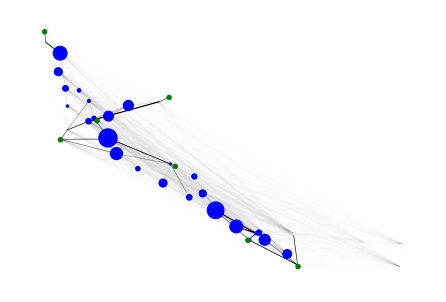

In [22]:
G = res.station_demand_g
sim_index = 50
#colors
for node in G.nodes:
    G.nodes[node]["color"] = "blue"
    G.nodes[node]["size"] = 0
for node in nx.get_node_attributes(G,'demand'):
    G.nodes[node]["color"] = "green"
    G.nodes[node]["size"] = 20
node_color = nx.get_node_attributes(G,'color').values() 
node_size = {node: edge_totals[sim_index][(node, node)] if (node, node) in edge_totals[sim_index] else G.nodes[node]["size"] for node in G.nodes}
widths = {edge:edge_totals[sim_index][edge]/100 if edge in edge_totals[sim_index] else .002 for edge in G.edges}
pos = nx.get_node_attributes(G,'pos')
nx.draw(G, pos = pos, node_size = list(node_size.values()), width= list(widths.values()), node_color=node_color, arrows=False)

In [ ]:
res = []
for i, file in enumerate(os.listdir("trials/wcctci_multiple_runs/")):
    if ".pkl" in file:
        with open('trials/wcctci_multiple_runs/' + file, 'rb') as inp:
            res.append(pickle.load(inp))

avgs = []
for r in res:
    avgs.append(r.metrics["hours_spent_in_queues"][3])
np.std(avgs)

In [ ]:
avgs = []
for r in res:
    avgs.append(r.metrics["hours_spent_in_queues"][3])
np.std(avgs)